In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib.patches import Ellipse

In [2]:

class CostFunction_circle:
    """Cost function for circle fit (x=[cx, cy, r]. Initialised with points."""
    def __init__(self, pts):
        self.pts = pts
    
    def f(self, x):
        """Evaluate cost function fitting circle centre (x[0], x[1]) radius x[2]"""
        r2 = np.square(self.pts[0, :] - x[0]) + np.square(self.pts[1, :] - x[1])
        d = np.square(np.sqrt(r2) - x[2])
        return np.sum(d)

class CostFunction_ellipse:
    """Cost function for ellipse fit(x=[ A B C D E]. Initialised with points."""
    
    def __init__(self, pts):
        self.pts = pts
    
    def f(self, x1):
        """Evaluate cost function fitting ellipse"""
        x = self.pts[0, :]
        y = self.pts[1, :]
        
        x = x[:, np.newaxis]
        y = y[:, np.newaxis]
        
        x1 = x1[np.newaxis, :]
        D = np.hstack((x*x, x*y, y*y, x, y, np.ones_like(x)))
        C = np.zeros([6, 6])
        C[0, 2] = C[2, 0] = 2; C[1, 1] = -1
        
        aa = np.dot(x1, D.T)
        aa = np.dot(aa, D)
        aa = np.dot(aa, x1.T)
        bb = np.dot(x1, C)
        bb = np.dot(bb, x1.T)
        d = aa - bb
        return np.sum(d)

def solve_ellipse(A, B, C, D, E, F):
    Xc = (B*E - 2*C*D)/(4*A*C - B**2)
    Yc = (B*D - 2*A*E)/(4*A*C - B**2)
    
    FA1 = 2*(A*Xc**2 + C*Yc**2 + B*Xc*Yc - F)
    FA2 = np.sqrt((A - C)**2 + B**2)
    
    MA = np.sqrt(FA1/(A + C + FA2))
    SMA = np.sqrt(FA1/(A + C - FA2)) if A + C - FA2 != 0 else 0
    
    if B == 0 and F*A < F*C:
        Theta = 0
    elif B == 0 and F*A >= F*C:
        Theta = 90
    elif B != 0 and F*A < F*C:
        alpha = np.arctan((A - C)/B)*180/np.pi
        Theta = 0.5*(-90-alpha) if alpha<0 else 0.5*(90-alpha)
    else:
        alpha = np.arctan((A-C)/B)*180/np.pi
        Theta = 90+0.5*(-90-alpha) if alpha<0 else 90+0.5*(90-alpha)
        
    if MA<SMA:
        MA,SMA = SMA,MA
        
    return [Xc,Yc,MA,SMA,Theta]

In [3]:
data_file = 'l2_nD_assessment.txt'
shapes = np.genfromtxt(data_file)

Best fit has centre ( 2.020750646481063 , 3.5112183923949822 ) radius  1.7748106956913032


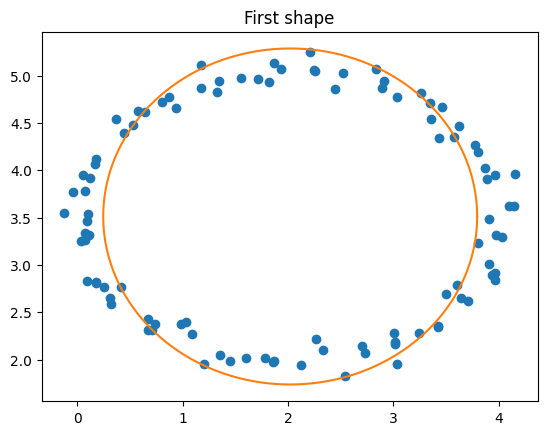

<Figure size 640x480 with 0 Axes>

In [4]:
c3 = CostFunction_circle(shapes)
x0 = np.zeros(3)
res = minimize(c3.f, x0, method='Powell')
print("Best fit has centre (",res.x[0],",",res.x[1],") radius ",res.x[2])

#plot a circle
theta = np.arange(0, 2*np.pi, 0.01)
x1 = res.x[0] + res.x[2] * np.cos(theta)
y1 = res.x[1] + res.x[2] * np.sin(theta)

plt.title("First shape")
plt.plot(shapes[0,:],shapes[1,:],"o")
plt.plot(x1,y1)
plt.show()
plt.savefig("circles.png")

/tmp/ipykernel_62845/2031945283.py:10: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = Ellipse([Xc,Yc], MA*2,SMA*2, Theta)


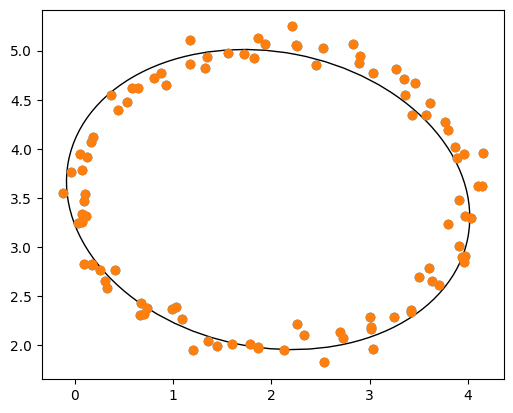

<Figure size 640x480 with 0 Axes>

In [5]:
# x^2+Axy+By^2+Cx+Dy+E=0
e3=CostFunction_ellipse(shapes)
x2=np.array([0.01]*6,dtype='float64')


res1=minimize(e3.f,x2,method='Powell')

[Xc,Yc,MA,SMA,Theta] = solve_ellipse(res1.x[0],res1.x[1],res1.x[2],res1.x[3],res1.x[4],res1.x[5])

ell = Ellipse([Xc,Yc], MA*2,SMA*2, Theta)

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
plt.plot(shapes[0,:],shapes[1,:],"o")
ax.add_artist(ell)
ell.set_facecolor("white")
ell.set_edgecolor("black")
plt.plot(shapes[0,:],shapes[1,:],"o")

plt.show()
plt.savefig("Ellipse.png")